In [9]:
import os
import sys
os.chdir(os.path.dirname('../'))
from plt_bms_stk import index_comp_desc, echart_indexs_zig

In [1]:
import efinance as ef
import pandas as pd
import quantstats as qstat

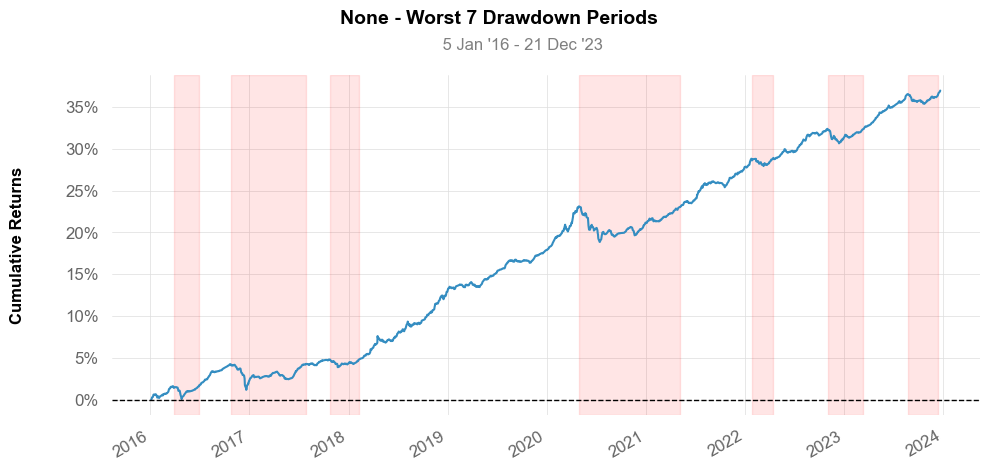

,start,valley,end,val days,days,max drawdown,99% max drawdown
54,2020-04-30,2020-07-14,2021-05-07,75,373,-3.458883,-3.363183
9,2016-10-25,2016-12-20,2017-07-27,56,276,-2.939039,-2.712959
5,2016-03-28,2016-04-26,2016-06-29,29,94,-1.523936,-1.399702
88,2022-11-01,2022-12-13,2023-03-13,42,133,-1.315873,-1.265018
17,2017-10-25,2017-11-23,2018-02-08,29,107,-0.883392,-0.867331
95,2023-08-25,2023-10-24,2023-12-13,60,111,-0.850539,-0.825886
22,2018-04-19,2018-05-17,2018-06-26,28,69,-0.727415,-0.711772
75,2022-01-25,2022-03-10,2022-04-13,44,79,-0.686005,-0.633738
49,2020-03-10,2020-03-19,2020-03-30,9,21,-0.675111,-0.598552
67,2021-09-07,2021-10-18,2021-11-01,41,56,-0.560598,-0.520555


In [26]:
e1 = ef.fund.get_quote_history('161119')  # 518880, 161119
e1.columns = ['date','iden', 'acc', 'inc']
e1.set_index('date',inplace=True)
e1.sort_index(inplace=True)
e1 = e1.tail(243*8)
e1.index = pd.to_datetime(e1.index)
# qstat.reports.basic(e1['acc'],periods_per_year=243)
qstat.plots.drawdowns_periods(e1['acc'],periods=7,grayscale=False)
tt = qstat.stats.drawdown_details(qstat.stats.to_drawdown_series(e1['acc']))
tt.sort_values('max drawdown',inplace=True)
toval = pd.to_datetime(tt.valley)-pd.to_datetime(tt.start)
tt.insert(3,'val days',toval.values.astype('timedelta64[D]').astype(int))
tt.head(10)

### 2023：新的低点

In [10]:
tb1 = echart_indexs_zig(beg='2022-10-10',end='2023-12-01',plt_width=960,zig_pct=4,save_pth=None)
tb1.render_notebook()

2023全年，全指呈现先上涨再下跌的整体情况。
- 22年冬-23年春：小盘股于2022年十一后即刻反弹，在2023年2月中旬创出高点；而大盘股在十月底开启上涨，春节即为全年最高点
- 23年春：整体呈震荡，4月中旬确定下跌
- 23年春夏：下跌后，小盘股经历5月中旬至8月初的震荡平台，大盘股则稍晚两周（6月初至9月底）
- 23年冬：小盘股、大盘股先后跌破平台后，于10月下旬反弹。11月中下旬，小盘股开始震荡，大盘股则创出新低

#### 复苏与现实：2022Q4~2023Q1

自22年国庆后，伴随防疫措施的松动，基于对未来经济复苏的预期，市场开启反弹。其间小盘股以TMT板块为代表开启了一段持续且有力的上涨；而10月末至春节前，核心资产（包括沪深300，恒生、中概股等）进行了短暂而剧烈的反弹。

- 2022国庆后首次反弹，由小盘股启动，大约持续一周时间

,0',5',24',60',inc,incOC,incLC,amtP
上证50,0.28,0.02,-0.09,-0.37,-0.07,-0.48,0.30,0.72
沪深300,0.30,0.13,0.08,-0.30,0.23,-0.12,0.58,0.86
中证500,0.12,0.27,0.39,-0.30,0.84,0.74,1.38,0.91
中证1000,0.17,0.08,0.02,-0.54,0.51,0.38,1.32,0.91
国证2000,0.13,0.01,0.02,-0.49,0.90,0.81,1.69,0.94
国证A指,0.22,0.10,0.09,-0.39,0.52,0.29,1.06,0.90


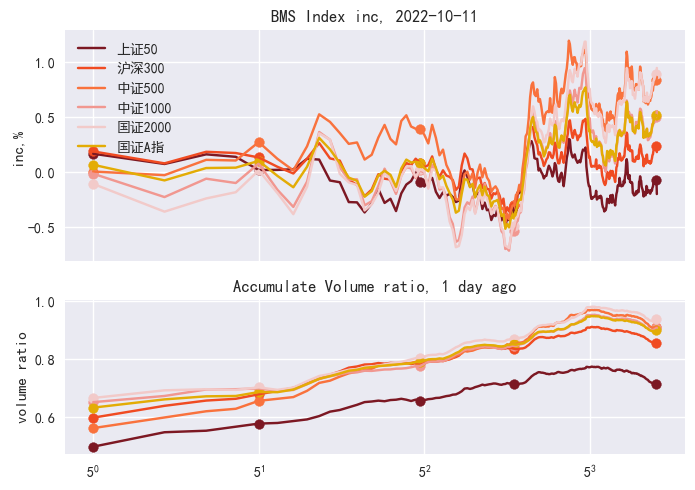

In [4]:
p1, hnms1=index_comp_desc('2022-09-20','2022-11-20','2022-10-11',None,comp_day=-1)
p1.style.format(precision=2).highlight_max(subset=hnms1).highlight_min(subset=['amtP'])

,0',5',24',60',inc,incOC,incLC,amtP,Zbeg,Zend,Zdays,Zinc
上证50,-0.08,-0.47,-1.17,-1.51,0.61,0.68,2.92,1.37,2022-10-13,2022-10-17,2,2.45
沪深300,-0.13,-0.37,-0.99,-0.95,1.52,1.65,3.35,1.26,2022-10-10,2022-10-17,5,3.37
中证500,-0.07,-0.43,-0.73,-0.62,2.37,2.47,4.04,1.25,2022-10-10,2022-10-18,6,7.10
中证1000,-0.00,-0.35,-1.07,-0.53,2.88,2.91,4.64,1.31,2022-10-10,2022-10-18,6,8.76
国证2000,-0.03,-0.29,-0.81,-0.29,3.02,3.08,4.49,1.28,2022-10-10,2022-10-18,6,9.44
国证A指,-0.09,-0.37,-0.90,-0.72,2.03,2.14,3.76,1.26,2022-10-10,2022-10-18,6,5.56


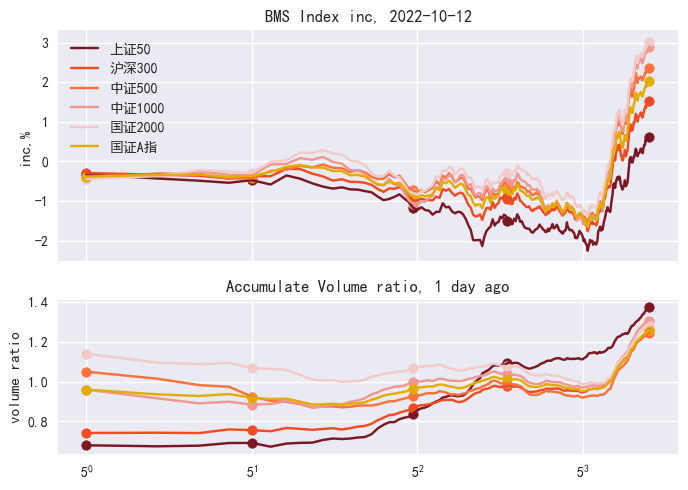

In [5]:
p2, hnms2=index_comp_desc('2022-09-20','2022-11-20','2022-10-12',5,comp_day=-1)
p2.style.format(precision=2).highlight_max(subset=hnms2).highlight_min(subset=['amtP'])

- 22年十月底，基于防疫措施放松的预期，大盘股引导了上涨，持续约两周

,0',5',24',60',inc,incOC,incLC,amtP
上证50,-1.12,-1.47,-0.60,-1.31,-1.24,-0.22,0.35,1.07
沪深300,-1.04,-1.03,-0.28,-0.99,-0.92,0.12,0.36,1.04
中证500,-0.64,-0.14,0.26,-0.26,0.41,1.08,1.11,1.02
中证1000,-0.61,0.09,0.76,0.17,0.81,1.47,1.47,0.95
国证2000,-0.55,0.30,0.87,0.38,0.99,1.60,1.60,0.91
国证A指,-0.84,-0.54,0.11,-0.51,-0.16,0.70,0.70,0.96


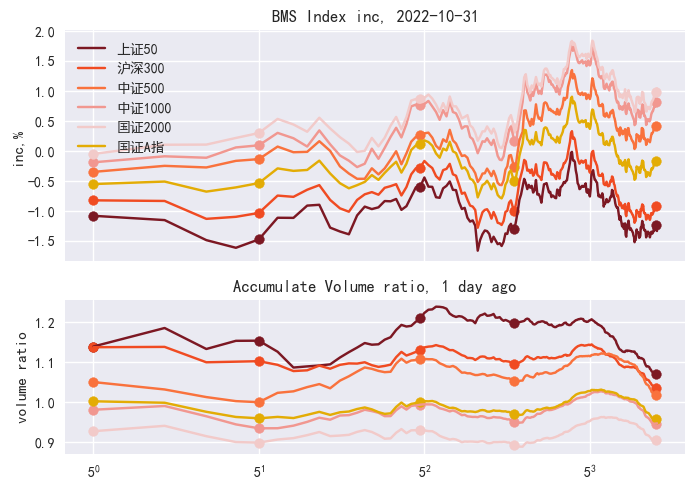

In [42]:
p1, hnms=index_comp_desc('2022-10-24','2022-12-20','2022-10-31',None,comp_day=-1)
p1.style.format(precision=2).highlight_max(subset=hnms).highlight_min(subset=['amtP'])

,0',5',24',60',inc,incOC,incLC,amtP,Zbeg,Zend,Zdays,Zinc
上证50,0.46,1.02,1.14,2.53,4.34,3.91,3.91,1.28,2022-10-31,2022-11-15,11,12.54
沪深300,0.32,0.67,0.65,2.01,3.55,3.25,3.31,1.15,2022-10-31,2022-11-15,11,10.18
中证500,0.12,0.51,-0.17,1.11,2.29,2.18,2.67,1.10,2022-10-28,2022-11-15,12,7.86
中证1000,0.10,0.65,-0.02,1.40,2.36,2.24,2.58,1.07,2022-10-28,2022-11-15,12,8.21
国证2000,0.21,0.80,0.24,1.48,2.48,2.30,2.49,1.10,2022-10-28,2022-11-15,12,9.19
国证A指,0.23,0.67,0.39,1.69,3.01,2.80,2.87,1.12,2022-10-31,2022-11-15,11,9.22


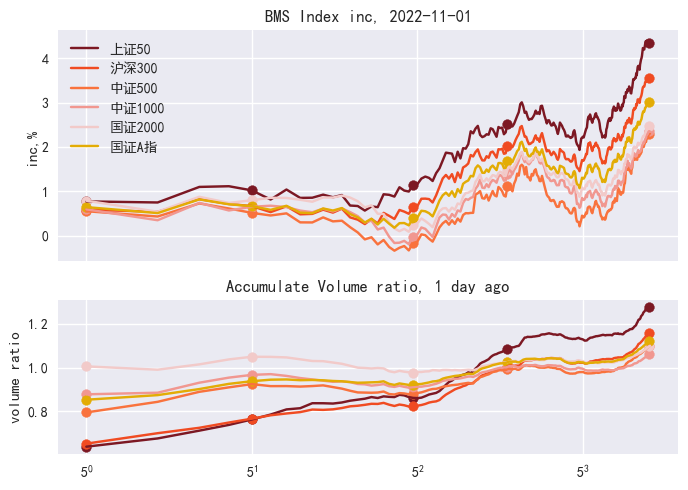

In [43]:
p2, hnms2=index_comp_desc('2022-10-24','2022-12-20','2022-11-01',3,comp_day=-1)
p2.style.format(precision=2).highlight_max(subset=hnms2).highlight_min(subset=['amtP'])

- 22年11月底，防疫彻底结束，仍然是由大盘股带动上涨，持续约两周

,0',5',24',60',inc,incOC,incLC,amtP
上证50,-2.17,-2.50,-2.95,-2.90,-1.63,0.57,1.82,1.07
沪深300,-1.96,-2.07,-2.32,-2.11,-1.12,0.85,1.66,1.02
中证500,-1.45,-1.22,-1.47,-1.12,-0.57,0.92,1.43,1.14
中证1000,-1.31,-0.85,-0.74,-0.72,-0.33,1.02,1.26,1.02
国证2000,-1.20,-0.79,-0.76,-0.66,-0.36,0.88,1.21,0.97
国证A指,-1.62,-1.52,-1.67,-1.46,-0.73,0.92,1.48,1.03


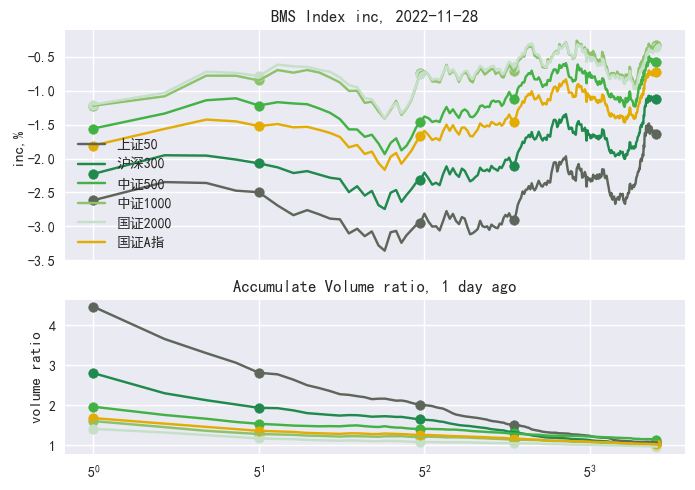

In [45]:
p1, hnms=index_comp_desc('2022-11-13','2022-12-31','2022-11-28',None,comp_day=-1)
p1.style.format(precision=2).highlight_max(subset=hnms).highlight_min(subset=['amtP'])

,0',5',24',60',inc,incOC,incLC,amtP,Zbeg,Zend,Zdays,Zinc
上证50,1.40,1.86,1.82,2.73,4.02,2.72,2.72,1.59,2022-11-28,2022-12-09,9,8.11
沪深300,0.89,1.21,1.09,1.85,2.97,2.17,2.17,1.47,2022-11-28,2022-12-09,9,7.10
中证500,0.27,0.84,0.66,1.01,1.76,1.52,1.53,1.27,2022-11-28,2022-12-05,5,2.64
中证1000,0.20,0.55,0.34,0.59,1.54,1.36,1.36,1.18,2022-11-28,2022-12-05,5,3.41
国证2000,0.16,0.54,0.49,0.74,1.59,1.46,1.46,1.19,2022-11-28,2022-12-05,5,3.67
国证A指,0.56,0.95,0.83,1.36,2.34,1.85,1.85,1.28,2022-11-28,2022-12-09,9,5.02


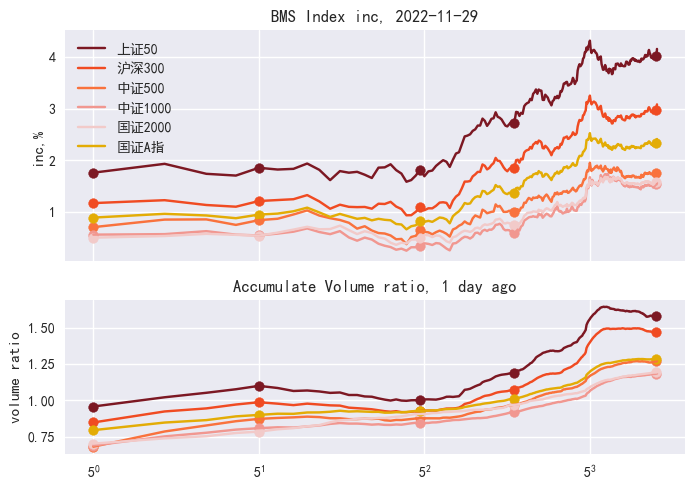

In [44]:
p2, hnms2=index_comp_desc('2022-11-13','2022-12-31','2022-11-29',5,comp_day=-1)
p2.style.format(precision=2).highlight_max(subset=hnms2).highlight_min(subset=['amtP'])

- 22年12月底，度过感染高峰期，全市场开启较为持续的上涨，持续近一个月
- 其中小盘股涨幅大，持续时间也更长

,0',5',24',60',inc,incOC,incLC,amtP,Zbeg,Zend,Zdays,Zinc
上证50,0.05,0.08,-0.23,0.11,-0.17,-0.37,0.10,1.21,2022-12-20,2023-01-30,23,9.22
沪深300,0.06,0.17,0.01,0.40,0.46,0.34,0.42,1.14,2022-12-23,2023-01-30,20,9.75
中证500,0.10,0.45,0.59,1.11,1.38,1.29,1.29,1.14,2022-12-23,2023-02-14,31,11.00
中证1000,0.02,0.34,0.62,1.25,1.85,1.84,1.84,1.08,2022-12-23,2023-02-15,32,14.65
国证2000,0.05,0.42,0.72,1.35,1.89,1.86,1.86,1.05,2022-12-23,2023-02-15,32,15.04
国证A指,0.06,0.31,0.35,0.85,1.11,1.03,1.03,1.07,2022-12-23,2023-02-14,31,10.75


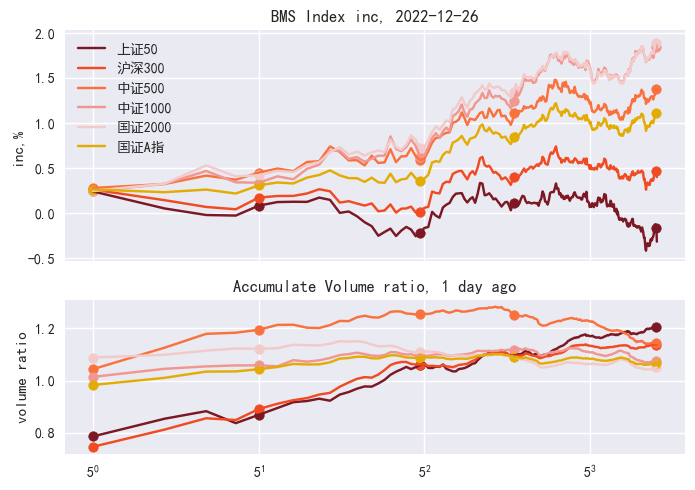

In [41]:
p1, hnms=index_comp_desc('2022-12-10','2023-02-20','2022-12-26',5,comp_day=-1)
p1.style.format(precision=2).highlight_max(subset=hnms).highlight_min(subset=['amtP'])

#### 预期落空：2023Q1~2023Q2